<img src="https://raw.githubusercontent.com/Daniel-RPS/House-Rocket-Company-USA/master/seattle-city-outline-icon-elements-cityscapes-illustration-line-signs-symbols-can-be-used-web-logo-mobile-app-ui-ux-151282408.jpg" height="20px">

# Análise do valor das casas de Seattle

Empresas imobiliárias online oferecem avaliações de casas usando técnicas de aprendizado de máquina. 
O objetivo deste relatório é analisar as vendas de casas em King County, Seattle, Estado de Washington, EUA, 
usando técnicas de ciência de dados. O conjunto de dados consiste em dados históricos de casas vendidas 
entre maio de 2014 a maio de 2015.

Link original: https://www.kaggle.com/shivachandel/kc-house-data

* Neste notebook, utilizaram-se técnicas de limpeza ... que removeram outliers e valores duplicados do dataset original.

### Bibliotecas utilizadas

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

### Obtendo dados e abrindo o dataset

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df = df.rename(columns={'Unnamed: 0': 'House'}) #Renomear a coluna 'Unnamed: 0'
df.set_index('House', inplace=True) #Retirar coluna  de índices e colocar a coluna House
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
House,,,,,,,,,,,,,,,,,,,,,
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Eliminando toda a bagunça que estava na coluna date e peguei apenas os dados que me interessavam: mês e ano.
df['date']=[x[:8] for x in df['date']]

#Transformando a coluna date em datetime64[ns]
df.date = pd.to_datetime(df.date)

#Renomear a coluna long para lon
df = df.rename(columns={'long': 'lon'})

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15
House,,,,,,,,,,,,,,,,,,,,,
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Dicionário de variáveis

* id :- It is the unique numeric number assigned to each house being sold.
* price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
* bedrooms :- It determines number of bedrooms in a house.
* bathrooms :- It determines number of bathrooms in a bedroom of a house.
* sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
* sqft_lot : It is also the measurement variable which determines square foot of the lot.
* floors: It determines total floors means levels of house.
* waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
* view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
* condition : It determines the overall condition of a house on a scale of 1 to 5.
* grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
* sqft_above : It determines square footage of house apart from basement.
* sqft_basement : It determines square footage of the basement of the house.
* yr_built : It detrmines the date of building of the house.
* yr_renovated : It detrmines year of renovation of house.
* zipcode : It determines the zipcode of the location of the house.
* lat : It determines the latitude of the location of the house.
* lon : It determines the longitude of the location of the house.
* sqft_living15 : Living room area in 2015(implies-- some renovations)
* sqft_lot15 : lotSize area in 2015(implies-- some renovations)
* year :- It is the year on which the house was sold out.
* month :- It is the month on which the house was sold out.
* day :- It is the day on which the house was sold out.

In [4]:
#Verificando as informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21600 non-null  float64       
 4   bathrooms      21603 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [5]:
#Número de linhas e colunas
df.shape

(21613, 21)

In [6]:
#Colunas do dataset
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'lon', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
#Descrição dos dados
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* `count` - Contagem de entradas válidas para cada variável
* `mean`  - Média aritmética dos valores da variável
* `std`   - Desvio padrão
* `min`   - Menor valor existente para a variável
* `25%`   - Primeiro quartil
* `50%`   - Mediana
* `75%`   - Terceiro quartil
* `max`   - Maior valor existente para a variável

In [8]:
df.isnull().sum()

id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
lon               0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [9]:
med_bed = df['bedrooms'].mean()
med_bath = df['bathrooms'].mean()

#Arredondando valores
import math
med_bed = math.floor(med_bed)
med_bath = math.floor(med_bath)

# Substituindo valores nulos das colunas bedrooms e bathrooms pela média de cada coluna
df['bedrooms'].fillna(med_bed, inplace=True)
df['bathrooms'].fillna(med_bath, inplace=True)

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
lon              0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#Não há valores duplicados no dataset
df.duplicated().sum()

0

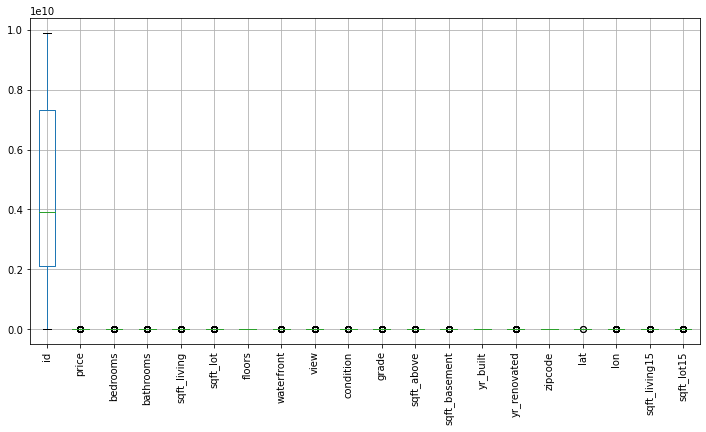

In [11]:
#Analisando os outliers. É possível ver que não existe nenhum valor absurdo que possa comprometer a análise do dataset 
plt.figure(figsize=(12,6))
df.boxplot()
plt.xticks(rotation = 90);

In [12]:
df.bedrooms.value_counts()

3.0     9837
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: bedrooms, dtype: int64

In [13]:
#Há uma casa com 33 quartos. Poder ser um outlier e por isso, foi retirado.
df=df[df['bedrooms']!=33]

In [14]:
#Checando a porcentagem de valores ausentes para cada variável
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

id               0.0
grade            0.0
sqft_living15    0.0
lon              0.0
lat              0.0
zipcode          0.0
yr_renovated     0.0
yr_built         0.0
sqft_basement    0.0
sqft_above       0.0
condition        0.0
date             0.0
view             0.0
waterfront       0.0
floors           0.0
sqft_lot         0.0
sqft_living      0.0
bathrooms        0.0
bedrooms         0.0
price            0.0
sqft_lot15       0.0
dtype: float64

In [15]:
#Criando uma cópia do dataframe
df_clean = df.copy()

In [16]:
#Salvando a cópia
df_clean.to_csv('kc_dataset_clean.csv', index=False)

**************************************************************************************************

## 1 - Média de preço de casa por número de quartos

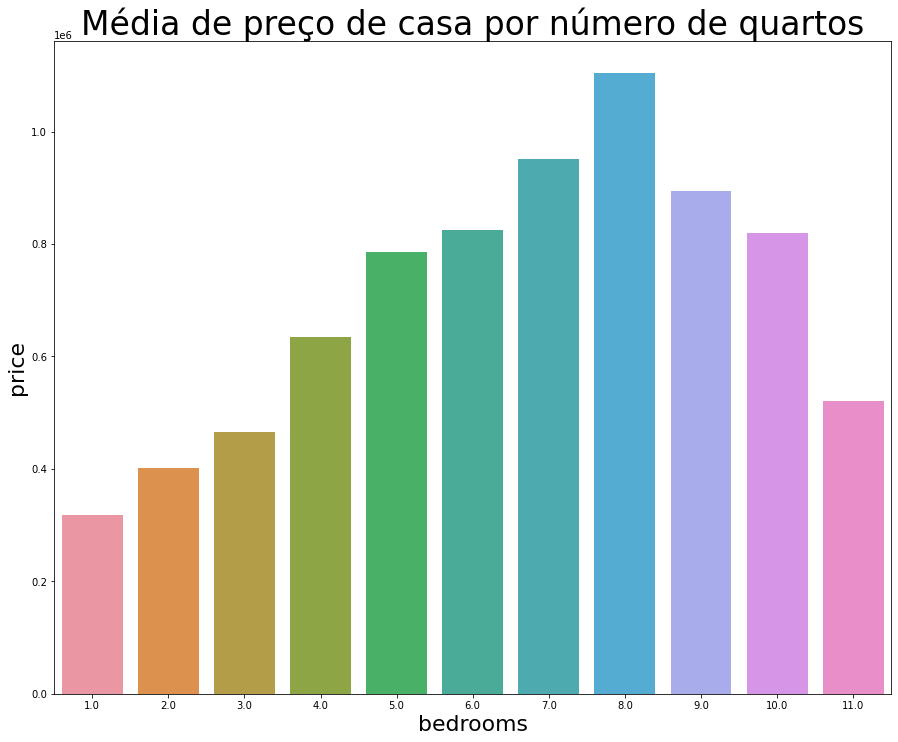

In [17]:
plt.figure(figsize=(15,12))
plt.title('Média de preço de casa por número de quartos', fontsize=33)
plt.ylabel('price',fontsize=22)
plt.xlabel('bedrooms',fontsize=22)

media_quarto = df_clean[['bedrooms','price']].groupby('bedrooms').mean().reset_index()

sns.barplot(x='bedrooms', y='price',data=media_quarto);

In [18]:
media_quarto = df_clean[['bedrooms','price']].groupby('bedrooms').mean().reset_index()
round(media_quarto,2)

,bedrooms,price
0,1.0,317642.88
1,2.0,401372.68
2,3.0,466157.11
3,4.0,635419.50
4,5.0,786599.83
5,6.0,825520.64
6,7.0,951184.66
7,8.0,1105076.92
8,9.0,893999.83
9,10.0,819333.33


## 2 - Média de preço de casa por notas

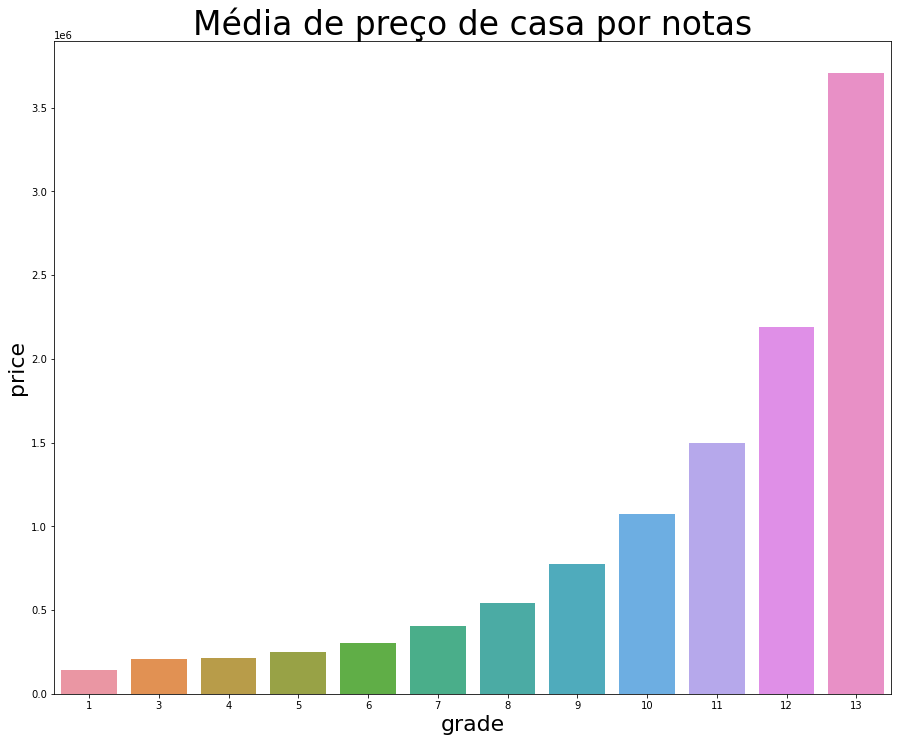

In [19]:
plt.figure(figsize=(15,12))

plt.title('Média de preço de casa por notas', fontsize=33)
plt.ylabel('price',fontsize=22)
plt.xlabel('grade',fontsize=22)

media_nota = df_clean[['grade','price']].groupby('grade').mean().reset_index()

sns.barplot(x='grade', y='price',data=media_nota);

In [20]:
round(media_nota,2)

,grade,price
0,1,142000.00
1,3,205666.67
2,4,214381.03
3,5,248523.97
4,6,301919.64
5,7,402563.82
6,8,542852.77
7,9,773513.19
8,10,1071771.07
9,11,1496841.73


## 3 - Evolução dos preços em 1 ano

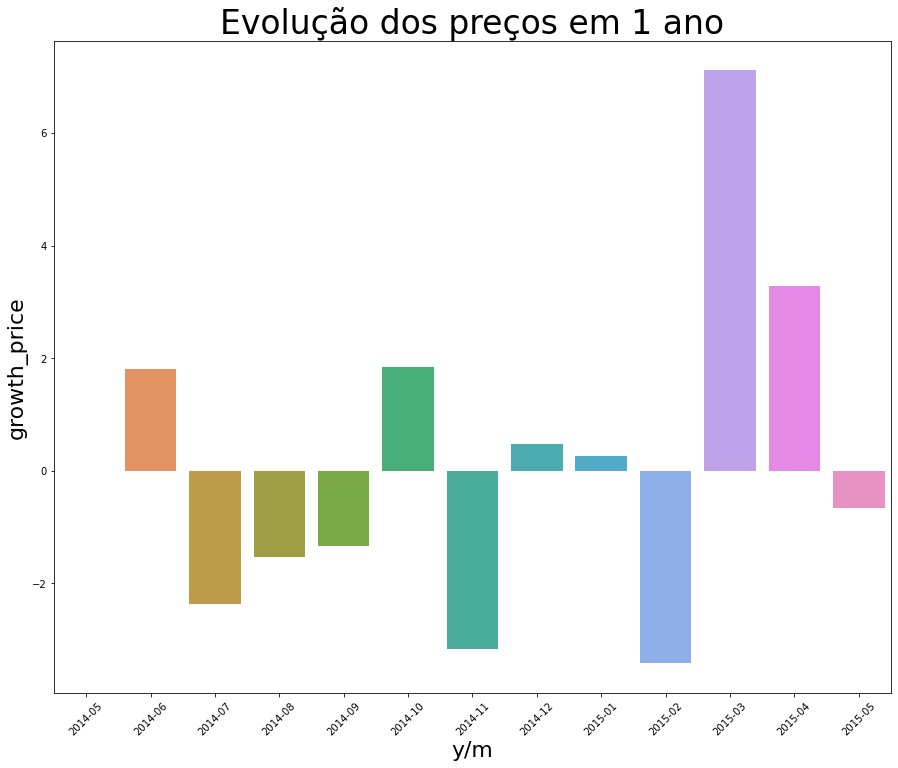

In [21]:
df_clean['y/m']= df_clean['date'].apply(lambda x: str(x)[:7]) #Separando apenas mês e ano

plt.figure(figsize=(15,12))
plt.title('Evolução dos preços em 1 ano', fontsize=33)
plt.ylabel('',fontsize=22)
plt.xlabel('',fontsize=22)

media_preco = df_clean[['y/m','price']].groupby('y/m').mean().reset_index()
media_preco['growth_price'] = 100*media_preco['price'].pct_change()
sns.barplot(x='y/m', y='growth_price',data=media_preco)
plt.xticks(rotation = 45);

In [22]:
media_preco['growth_price']

0          NaN
1     1.803439
2    -2.361405
3    -1.531509
4    -1.340576
5     1.846590
6    -3.166068
7     0.479127
8     0.268661
9    -3.426605
10    7.113462
11    3.283334
12   -0.660505
Name: growth_price, dtype: float64

## 4 - Média de preços por mês

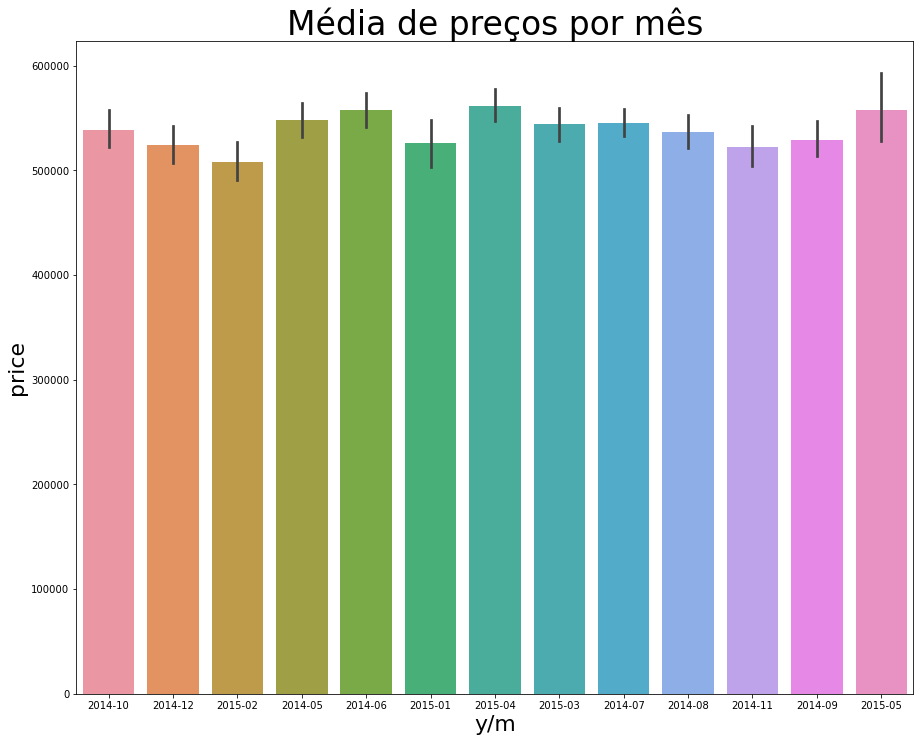

In [23]:
plt.figure(figsize=(15,12))
plt.title('Média de preços por mês', fontsize=33)
plt.ylabel('',fontsize=22)
plt.xlabel('',fontsize=22)

sns.barplot(x='y/m', y='price',data=df_clean);

In [27]:
round(df_clean[['y/m','price']].groupby('y/m').mean(),2).reset_index()

,y/m,price
0,2014-05,548080.28
1,2014-06,557964.57
2,2014-07,544788.76
3,2014-08,536445.28
4,2014-09,529253.82
5,2014-10,539026.97
6,2014-11,521961.01
7,2014-12,524461.87
8,2015-01,525870.89
9,2015-02,507851.37


In [56]:
mar_quinze = df_clean.loc[df_clean['y/m']=='2015-03']
mar_quinze.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,lon,sqft_living15,sqft_lot15,y/m
House,,,,,,,,,,,,,,,,,,,,,
9,3793500160,2015-03-12,323000.0,3.0,2.5,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015-03
14,1175000570,2015-03-12,530000.0,5.0,2.0,1810,4850,1.5,0,0,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015-03
29,1873100390,2015-03-02,719000.0,4.0,2.5,2570,7173,2.0,0,0,...,2570,0,2005,0,98052,47.7073,-122.110,2630,6026,2015-03
46,8945200830,2015-03-25,210490.0,3.0,1.0,990,8528,1.0,0,0,...,990,0,1966,0,98023,47.3066,-122.371,1228,8840,2015-03
49,822039084,2015-03-11,1350000.0,3.0,2.5,2753,65005,1.0,1,2,...,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,2015-03
